# Rough Load of FC C3 <img align="right" src="../Supplementary_data/dea_logo.jpg">

This notebook is to take a look at the new Collection 3 data and see how it compares to Collection 2

To do:
* Check nodata values
* Check speckle?
* Plot against the imagery for the same timestep?



* **Compatability:** Notebook currently compatible with the`DEA Sandbox` environments
* **Products used:** 


In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import datacube
import pandas as pd
import sys

sys.path.append("../Scripts")
from dea_datahandling import load_ard
from dea_plotting import display_map
from dea_plotting import rgb

In [2]:
dc = datacube.Datacube(app="Load_Fractional_Cover")

In [3]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
time_range = ("2010", "2021")

In [4]:
display_map(x=lon_range, y=lat_range)

## dc.load `ga_ls_fc_3` to take a look at the collection 3 Fractional Cover data


In [26]:
ds = dc.load(product="ga_ls_fc_3",
             x=lon_range,
             y=lat_range,
             time=time_range,
            output_crs='epsg:3577',
            resolution =(-30,30),
            group_by = 'solar_day')
#print(ds)

In [6]:
#print(ds.bs)

## dc.load surface reflectance and PQ data to mask Fractional Cover Data

In [35]:
ls = load_ard(dc=dc, products=['ga_ls5t_ard_3','ga_ls7e_ard_3', 'ga_ls8c_ard_3'], 
              fmask_categories=['valid', 'snow', 'water'],
              mask_pixel_quality=True, 
              mask_contiguity=True,
              ls7_slc_off=True,
              dtype='native',
              **query)

NameError: name 'query' is not defined

### Selecting and plotting a single timestep

In [16]:
first_timestep = ds.pv.isel(time=0)
#print(first_timestep)

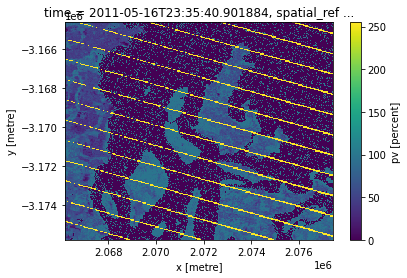

In [17]:
first_timestep.plot()

### Plot multiple timesteps


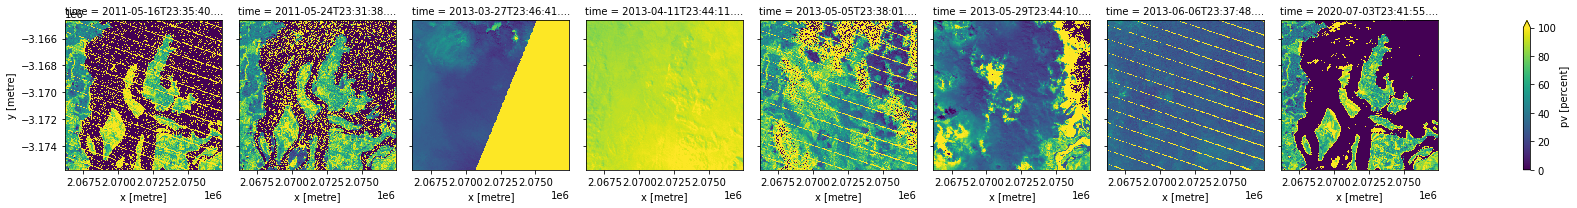

In [18]:
ds.pv.plot(col="time", vmin=0, vmax =100)

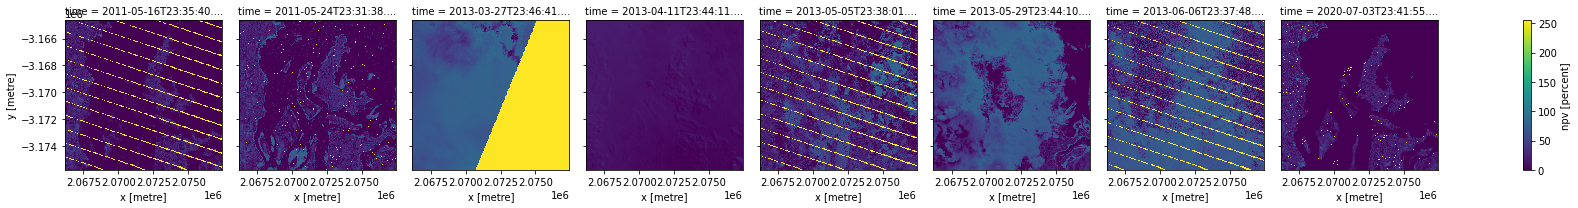

In [22]:
ds.npv.plot(col="time", robust=True)

## Plot false colour for Bare Soil, Photosynthetic and Non-Photosynthetic veg to check FC

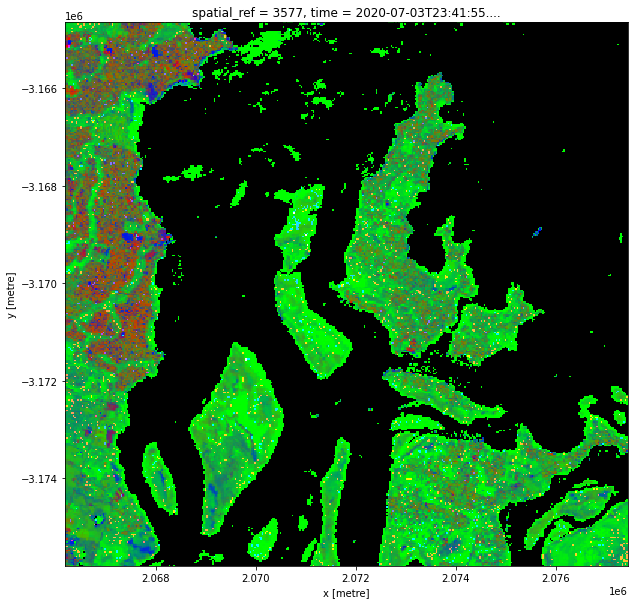

In [12]:
rgb(ds, bands=["bs", "pv", "npv"], index=-1, size =10)

## Test where array is non-zero

In [13]:
ds_filtered = ds.where(ds!=0)

In [14]:
#set bins as [0,255]
bins = list(range(0,256,1))

(array([0.000e+00, 0.000e+00, 1.417e+03, 1.361e+03, 1.352e+03, 1.383e+03,
        1.296e+03, 1.257e+03, 1.254e+03, 1.240e+03, 1.202e+03, 1.096e+03,
        1.030e+03, 1.003e+03, 9.360e+02, 9.240e+02, 7.960e+02, 7.300e+02,
        6.930e+02, 6.550e+02, 5.520e+02, 5.130e+02, 4.700e+02, 4.760e+02,
        4.410e+02, 4.490e+02, 4.550e+02, 4.620e+02, 4.280e+02, 3.950e+02,
        4.150e+02, 3.840e+02, 3.770e+02, 3.950e+02, 4.250e+02, 3.530e+02,
        3.680e+02, 3.860e+02, 3.910e+02, 3.150e+02, 3.430e+02, 2.900e+02,
        3.670e+02, 3.220e+02, 3.110e+02, 3.160e+02, 2.630e+02, 2.770e+02,
        2.640e+02, 2.390e+02, 2.490e+02, 2.450e+02, 2.090e+02, 2.170e+02,
        1.810e+02, 1.730e+02, 1.860e+02, 1.670e+02, 1.600e+02, 1.360e+02,
        1.410e+02, 1.190e+02, 1.060e+02, 1.040e+02, 1.110e+02, 1.110e+02,
        8.800e+01, 8.400e+01, 6.200e+01, 7.700e+01, 7.700e+01, 5.200e+01,
        6.000e+01, 3.100e+01, 3.600e+01, 3.800e+01, 2.300e+01, 2.200e+01,
        2.200e+01, 1.200e+01, 1.800e+0

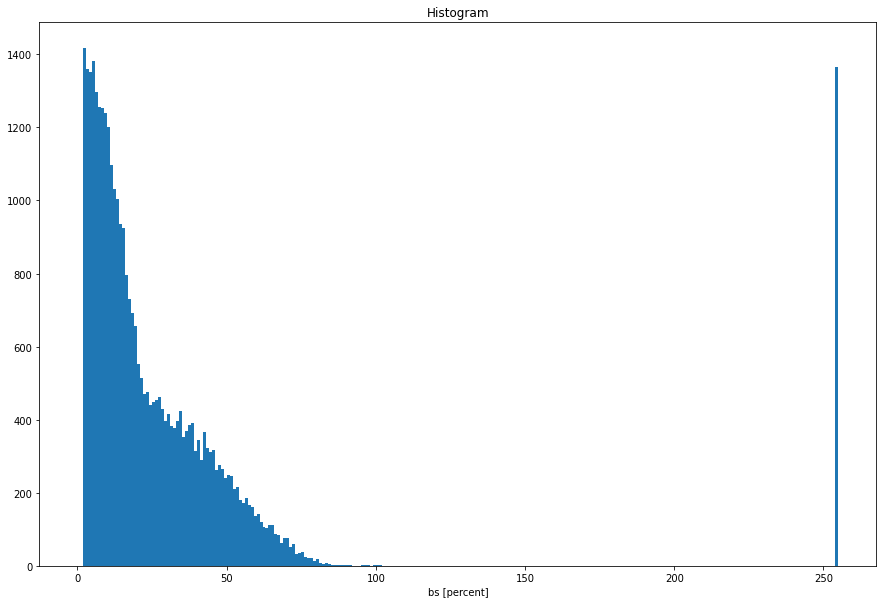

In [15]:

spec2 = gs.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
ds_filtered.bs.isel(time=-1).plot.hist(bins=bins, size=10)

### Plotting multiple timesteps
As discussed in the [single band example above](#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function can also do this, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`.
The example cell below plots the first and fifth image in the dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

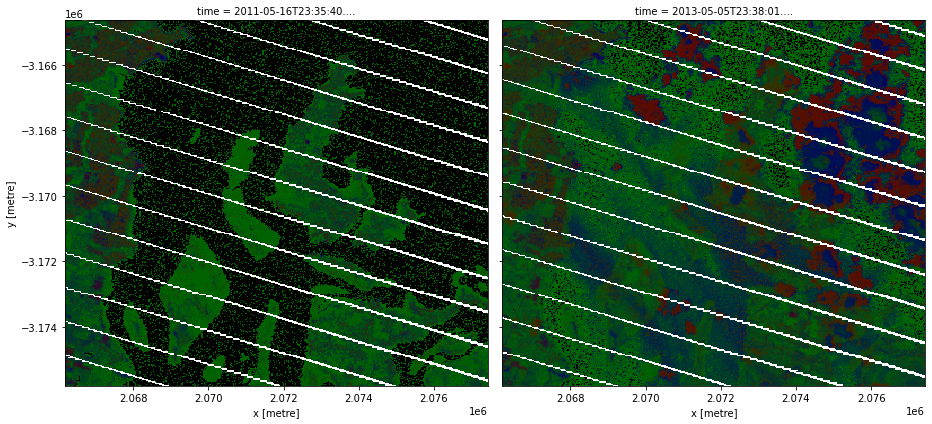

In [14]:
# View a true colour image for the first and fifth timesteps
rgb(ds, bands=['bs', 'pv', 'npv'], index=[0, 4])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

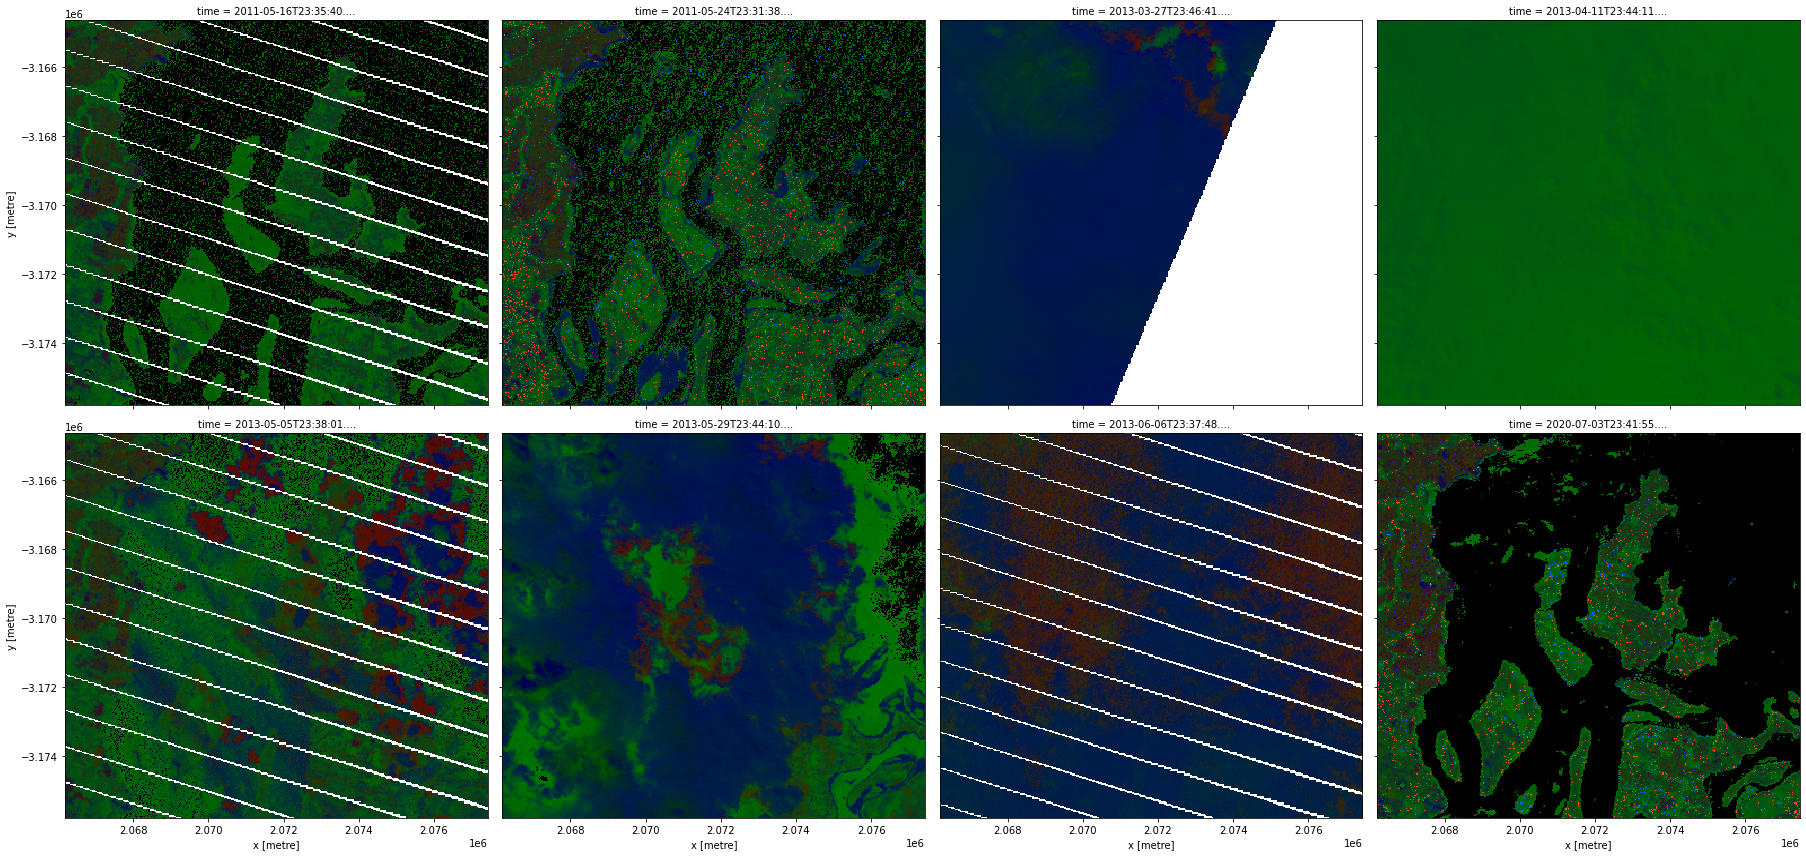

In [15]:
# Plot all timesteps in the dataset
rgb(ds, bands=['bs', 'pv', 'npv'], col="time")

### Customising plot appearance
By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. 
This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot.

For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

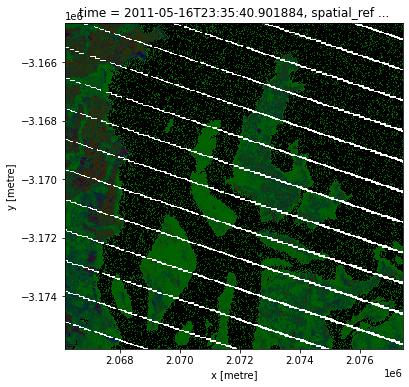

In [16]:
rgb(ds, 
    bands=['bs', 'pv', 'npv'], 
    index=0, 
    percentile_stretch=[0.05, 0.95])


## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_Jupyter_notebooks.ipynb)
2. [Digital Earth Australia](02_DEA.ipynb)
3. [Products and measurements](03_Products_and_measurements.ipynb)
4. [Loading data](04_Loading_data.ipynb)
5. **Plotting (this notebook)**
6. [Performing a basic analysis](06_Basic_analysis.ipynb)
7. [Parallel processing with Dask](07_Parallel_processing_with_Dask.ipynb)

For advanced plotting and visualisation options, see:

* The [dea plotting](../Scripts/dea_plotting.py) Python script containing functions used for plotting and visualising DEA data.

Now that you have completed the first five tutorials, join advanced users in exploring:

* The "DEA datasets" directory in the repository, where you can explore DEA products in depth.
* The "Frequently used code" directory, which contains a recipe book of common techniques and methods for analysing DEA data.
* The "Real-world examples" directory, which provides more complex workflows and analysis case studies.




***
## Additional information
**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2019

**Compatible datacube version:** 

In [17]:
print(datacube.__version__)

1.8.3


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)